Best number of hidden nodes: 40, with a test accuracy of 0.61875


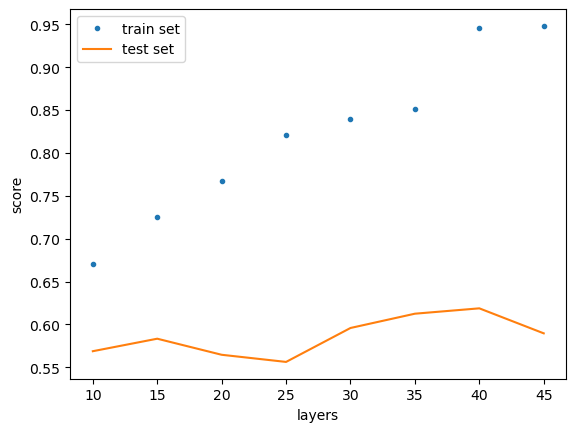

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

wine_dataset_file = "winequality-red.csv"

full_df = pd.read_csv(wine_dataset_file, header = 0, delimiter=";")

X = full_df.iloc[:, :-1]
Y = full_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=417)

train_score = []
test_score = []

# more layers does not improve test data
layers = list(range(10,50,5))
for i in layers:
    # scaling / normalizing data helps increase test
    pipe = make_pipeline(StandardScaler(), MLPClassifier(activation = 'logistic',
                                                     solver = 'sgd',
                                                     hidden_layer_sizes = (i,), #tired multiple layers as well, cannot break ~ 0.60 for test
                                                     alpha=1e-2,
                                                     max_iter = 1000,
                                                     learning_rate_init = 0.2))

    pipe.fit(X_train, y_train)
    train_score.append(pipe.score(X_train,y_train))
    test_score.append(pipe.score(X_test, y_test))

plt.plot(layers,train_score,'.',label = 'train set')
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()

optimal_index = test_score.index(max(test_score))
print(f'Best number of hidden nodes: {layers[optimal_index]}, with a test accuracy of {test_score[optimal_index]}')